# Regularizations
Goal: prevent overfitting <br>
The Reason we need Regularization is for Generalization. For predicting the future.
A theoretical justification for regularization is that it attempts to impose Occam's razor on the solution. <br>
From a Bayesian point of view, many regularization techniques correspond to imposing certain prior distributions on model parameters.<br>

Regularization can be used to learn simpler models, induce models to be sparse, introduce group structure into the learning problem, and more.

#### Types 
1) Ridge - puts an L2 norm penalty on the regression coefficients <br>
2) Lasso - puts an L1 norm penalty on the regression coefficients <br>
3) Elastic net regularization: linearly combines the L1 and L2 penalties of the lasso and ridge methods <br>
4) Tikhonov <br>
5) Bayesian a) Akaike information criterion (AIC) <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;           b) minimum description length (MDL)<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;          c) Bayesian information criterion (BIC) <br>
6) Neural Networks a) Early Stopping <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                                   b) Dropout
 <br> <br>                  
https://stats.stackexchange.com/questions/220243/the-proof-of-shrinking-coefficients-using-ridge-regression-through-spectral-dec

In [ ]:
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge

from sklearn.cross_validation import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

Let's generate a sinosoidal function as the unknown target function and try to fit some polynomial functions on it.

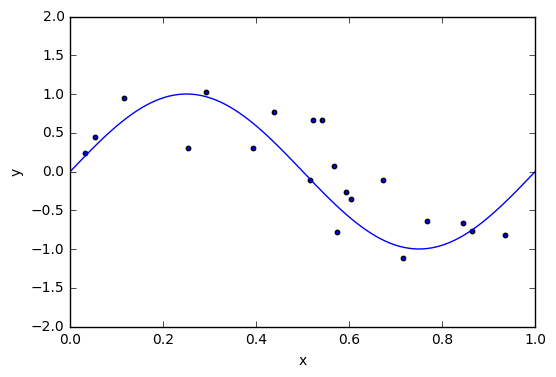

In [3]:
def f(x):
    return np.sin(2 * np.pi * x)

# generate points used to plot
x_plot = np.linspace(0, 1, 100)

# generate points and keep a subset of them
n_samples = 100

X = np.random.uniform(0, 1, size=n_samples)[:, np.newaxis]

y = f(X) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

ax = plt.gca()
ax.plot(x_plot, f(x_plot), color='blue')
ax.scatter(X_train, y_train, s=10)
ax.set_ylim((-2, 2))
ax.set_xlim((0, 1))
ax.set_ylabel('y')
ax.set_xlabel('x')

Now let's see how different polynomials can approximate this curve

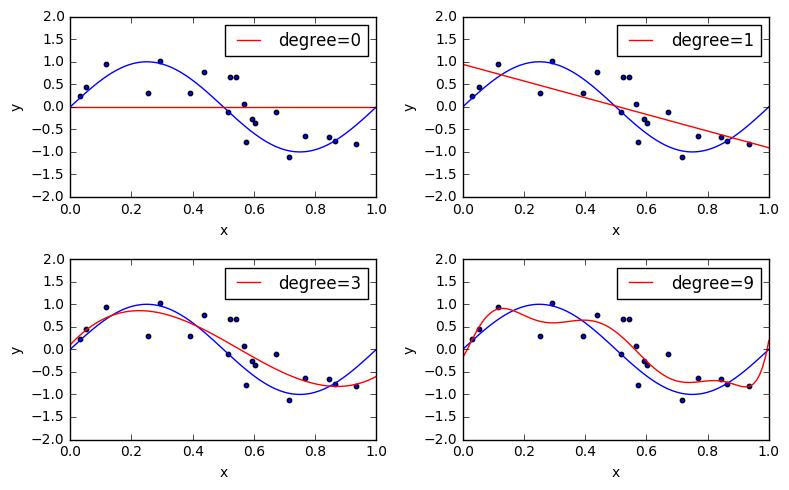

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), color='blue')
    ax.scatter(X_train, y_train, s=10)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right')  #, fontsize='small')

fig, axes = plt.subplots(2, 2, figsize=(8, 5))
# fit different polynomials and plot approximations
for ax, degree in zip(axes.ravel(), [0, 1, 3, 9]):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    plot_approximation(est, ax, label='degree=%d' % degree)
    
plt.tight_layout()

Plot the training and testing error as a function of the degree of the polynomial

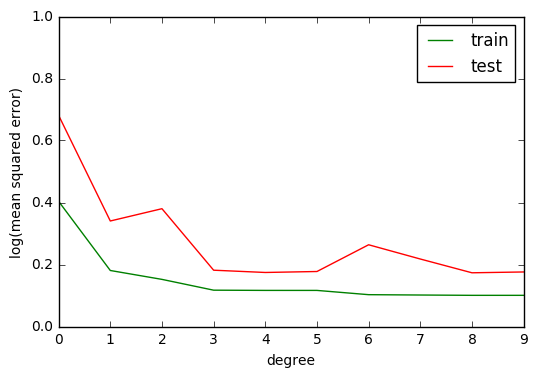

In [9]:
from sklearn.metrics import mean_squared_error

train_error = np.empty(10)
test_error = np.empty(10)
for degree in range(10):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))

plt.plot(np.arange(10), train_error, color='green', label='train')
plt.plot(np.arange(10), test_error, color='red', label='test')
plt.ylim((0.0, 1e0))
plt.ylabel('log(mean squared error)')
plt.xlabel('degree')
plt.legend(loc='upper right')

## Ridge
The smaller the value of alpha the higher the magnitude of the coefficients

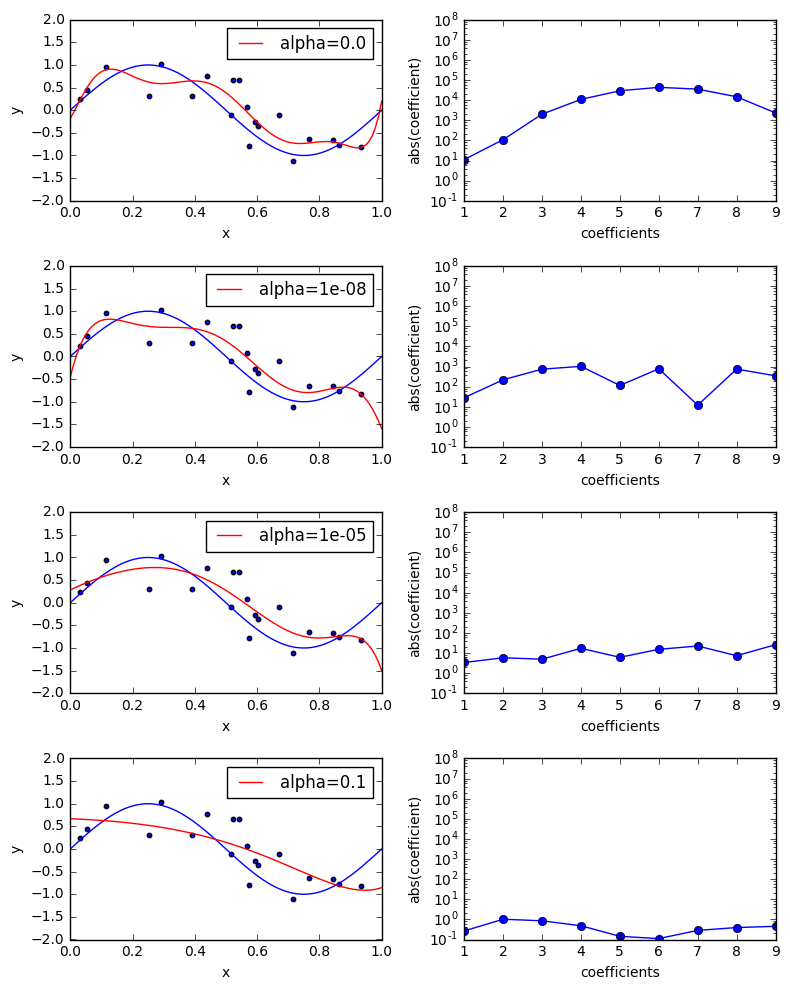

In [10]:
fig, ax_rows = plt.subplots(4, 2, figsize=(8, 10))

def plot_coefficients(est, ax, label=None, yscale='log'):
    coef = est.steps[-1][1].coef_.ravel()
    if yscale == 'log':
        ax.semilogy(np.abs(coef), marker='o', label=label)
        ax.set_ylim((1e-1, 1e8))
    else:
        ax.plot(np.abs(coef), marker='o', label=label)
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.set_xlim((1, 9))

degree = 9
alphas = [0.0, 1e-8, 1e-5, 1e-1]
for alpha, ax_row in zip(alphas, ax_rows):
    ax_left, ax_right = ax_row
    est = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
    est.fit(X_train, y_train)
    plot_approximation(est, ax_left, label='alpha=%r' % alpha)
    plot_coefficients(est, ax_right, label='Ridge(alpha=%r) coefficients' % alpha)

plt.tight_layout()

## Lasso
The difference between the two is that the LASSO leads to sparse solutions, driving most coefficients to zero, whereas Ridge Regression leads to dense solutions, in which most coefficients are non-zero. The intuition behind the sparseness property of the L1 norm penalty can be seen in the plot below. The plot shows the value of the penalty in the coefficient space, here a space with two coefficients w0 and w1. The L2 penalty appears as a cone in this space whereas the L1 penalty is a diamond. The objective function of a regularized linear model is just the ordinary least squared solution plus the (weighted) penalty term (the point that minimizes the objective function is where those two error surfaces meet), so in the case of the L2 penalty this is usually at the spike of the diamond, a sparse solution because some coefficients are zero. For the L2 penalty, on the other hand, the optimal point generally has non-zero coefficients. 
<br><br>
The L2 optimum (the intersection point) can fall on the axis lines only when the minimum MSE is also exactly on the axis. But in case of L1, the L1 optimum can be on the axis line because its contour is sharp and therefore there are high chances of interaction point to fall on axis. Therefore it is possible to intersect on the axis line, even when minimum MSE is not on the axis. If the intersection point falls on the axes it is known as sparse: L1 offers some level of sparsity which makes our model more efficient to store and compute as unimportant features can be set to exact zero.
<br><br>
Along with shrinking coefficients, lasso performs feature selection as well. Some of the coefficients become exactly zero, which is equivalent to the particular feature being excluded from the model. Since it provides sparse solutions, it is generally the model of choice (or some variant of this concept) for modelling cases where the #features are in millions or more. In such a case, getting a sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored.
<br><br>
Presence of Highly Correlated Features - Lasso arbitrarily selects any one feature among the highly correlated ones and reduced the coefficients of the rest to zero. Also, the chosen variable changes randomly with change in model parameters. This generally doesn’t work that well as compared to ridge regression.

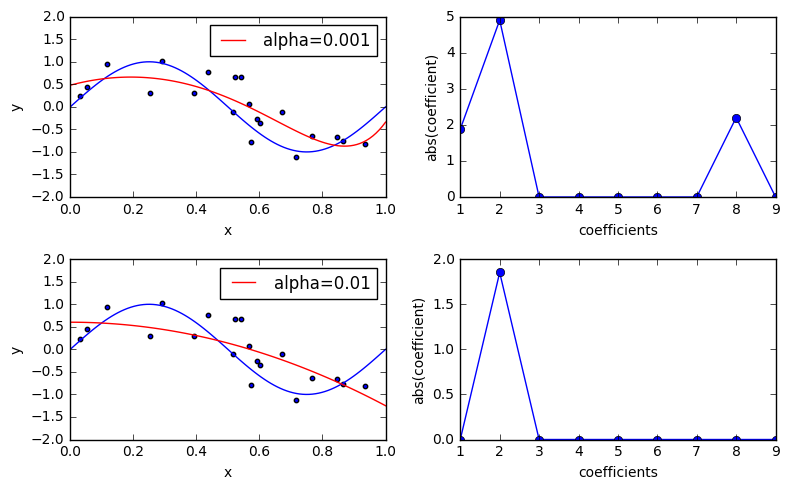

In [11]:
from sklearn.linear_model import Lasso

fig, ax_rows = plt.subplots(2, 2, figsize=(8, 5))

degree = 9
alphas = [1e-3, 1e-2]
for alpha, ax_row in zip(alphas, ax_rows):
    ax_left, ax_right = ax_row
    est = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
    est.fit(X_train, y_train)
    plot_approximation(est, ax_left, label='alpha=%r' % alpha)
    plot_coefficients(est, ax_right, label='Lasso(alpha=%r) coefficients' % alpha, yscale=None)

plt.tight_layout()

## Elastic Net
The convex combination of the L2 norm and the L1 norm. It too leads to a sparse solution.<br>
L2 and L1 regularization differ in how they cope with correlated predictors: L2 will divide the coefficient loading equally among them whereas L1 will place all the loading on one of them while shrinking the others towards zero. Elastic Net combines the advantages of both: it tends to either select a group of correlated predictors in which case it puts equal loading on all of them, or it completely shrinks the group.

In [15]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(X_train,y_train)
pred_cv = ENreg.predict(X_test)

#calculating mse
mse = np.mean((pred_cv - y_test)**2)
print("MSE: %f" % mse)

print (     ENreg.score(X_test,y_test)     )

MSE: 0.681057
-0.00911956207263


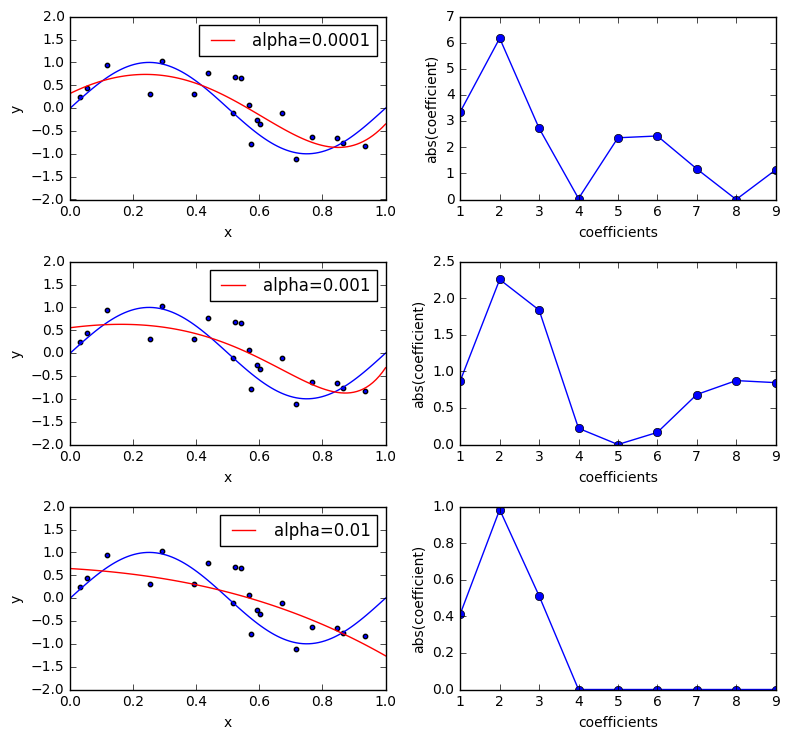

In [20]:
fig, ax_rows = plt.subplots(3, 2, figsize=(8, 7.5))

degree = 9
alphas = [1e-4, 1e-3, 1e-2]
for alpha, ax_row in zip(alphas, ax_rows):
    ax_left, ax_right = ax_row
    est = make_pipeline(PolynomialFeatures(degree), ElasticNet(alpha=alpha, l1_ratio=0.5, normalize=False))
    est.fit(X_train, y_train)
    plot_approximation(est, ax_left, label='alpha=%r' % alpha)
    plot_coefficients(est, ax_right, label='ElasticNet(alpha=%r) coefficients' % alpha, yscale=None)

plt.tight_layout()

l1_ratio: The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2. If you are interested in controlling the L1 and L2 penalty separately, keep in mind that this is equivalent to:
<br> a * L1 + b * L2 <br> where <br> l1_ratio = a / (a + b)
<br> <br>
Scikit-learn provides separate classes for LASSO and Elastic Net: `sklearn.linear_model.Lasso` and `sklearn.linear_model.ElasticNet`. In contrast to RidgeRegression, the solution for both LASSO and Elastic Net has to be computed numerically. The classes above use an optimization technique called coordinate descent. Alterntively, we can also use the class `sklearn.linear_model.SGDRegressor` which uses stochastic gradient descent instead and often is more efficient for large-scale, high-dimensional and sparse data.

### Optimizers

#### sklearn.linear_model.Ridge class' parameter solver (to use in the computational routines)

Options : {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’}
<br><br>
‘auto’ chooses the solver automatically based on the type of data.<br>
‘svd’ uses a Singular Value Decomposition of X to compute the Ridge coefficients. More stable for singular matrices than ‘cholesky’.<br>
‘cholesky’ uses the standard scipy.linalg.solve function to obtain a closed-form solution.<br>
‘sparse_cg’ uses the conjugate gradient solver as found in scipy.sparse.linalg.cg. As an iterative algorithm, this solver is more appropriate than ‘cholesky’ for large-scale data (possibility to set tol and max_iter).<br>
‘lsqr’ uses the dedicated regularized least-squares routine scipy.sparse.linalg.lsqr. It is the fastest but may not be available in old scipy versions. It also uses an iterative procedure.<br>
‘sag’ uses a Stochastic Average Gradient descent, and ‘saga’ uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale.

#### LARS Vs GLMNET for LASSO
When used in stage-wise mode, the LARS algorithm is a greedy method that does not yield a provably consistent estimator (in other words, it does not converge to a stable result when you increase the number of samples).Conversely, the LASSO (and thus the LARS algorithm when used in LASSO mode) solves a convex data fitting problem.
<br> <br>
Both methods can fit the Lasso, over a range of tuning parameters, for a standard linear model.  They both start from the null model (all zeros) and slowly add more predictors.  Define a "change point" to be a tuning parameter at which a new term enters the model;  at this change point, the new term is still zero.  However, when the model grows just a little bit more, this term will enter.  The Lars algorithm exactly finds these change points.  Any model between these change points can be found exactly (up to numerical error) by using linear interpolation.  Glmnet does not find these change points.  Instead, under the default settings, it finds a sequence of 100 models that are chosen in a way that is more related to the loss Y - X \beta.
<br>
However, there are two reasons that glmnet clearly out performs lars because it fits a broader class of objective functions.  First, it can fit "penalized Generalized linear models" (hence "glm").  Second, it can incorporate a Tikhonov regularization, or "ridge" penalty, in a way that is analogous to the Elastic net (hence "net"). 
<br> <br>
LARS is faster for small problems, very sparse problems, or very 'wide' problems (much much more features than samples). Indeed, its computational cost is limited by the number of features selected, if you don't compute the full regularization path. On the other hand, for big problems, glmnet (coordinate descent optimization) is faster. Amongst other things, coordinate descent has a good data access pattern (memory-friendly) and it can benefit from redundancy in the data on very large datasets, as it converges with partial fits. In particular, it does not suffer from heavily correlated datasets. <br>
If you do not have strong a priori knowledge of your data, you should rather use glmnet (or coordinate descent optimization, to talk about an algorithm rather than an implementation)
<br> <br>
Sklearn offers coordinate ascent or the LARS algorithm coded in Python(Numpy), whereas glmnet-python wraps Jerome Friedman’s Fortran code from the R glmnet package.
https://github.com/civisanalytics/python-glmnet
<br> <br>
https://stats.stackexchange.com/questions/33674/why-do-lars-and-glmnet-give-different-solutions-for-the-lasso-problem

## Tikhonov

Tikhonov regularization is a generalized form of L2-regularization. It allows us to articulate our prior knowlege about correlations between different predictors with a multivariate Gaussian prior. <br>
We can specify a prior covariance matrix to articulate our belief that parameters encoding neighboring points in space and time are correlated.
<br>  <br>
Not implemented in sklearn. Pyglmnet has one: <br>
http://glm-tools.github.io/pyglmnet/api.html
<br>
From scratch: https://github.com/HajimeKawahara/pinvprob/blob/master/tikhonov.py
<br>  <br>

Image deconvolution using Tikhonov regularization: <br>
http://news.zahlt.info/en/optimization/image-deconvolution-using-tikhonov-regularization/
<br>  <br>
How to configure lasso regression to not penalize certain variables?
https://stackoverflow.com/questions/44757238/how-to-configure-lasso-regression-to-not-penalize-certain-variables/44758231#44758231


### Kernel ridge regression


http://scikit-learn.org/stable/modules/kernel_ridge.html

### Hyperparameters and Cross Validations
Treat regularization and any parameters associated with your regularization method, as hyperparameters that need to be searched over.<br>
--learning rate  <br>
--regularization penalty term <br>
--Choice of regularization method - L2, L1, ElasticNet, None <br>


http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /u/tyagi/scikit_learn_data


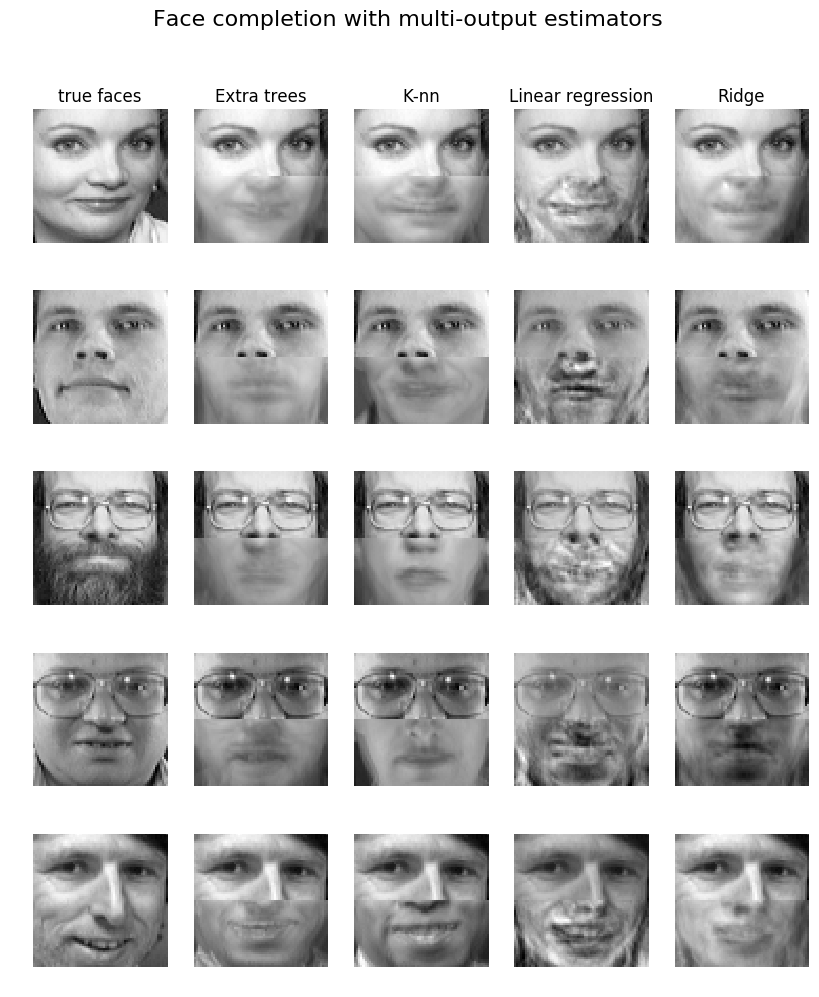

In [21]:
# Example of RidgeCV. 
""" 
This example shows the use of multi-output estimator to complete images. 
The goal is to predict the lower half of a face given its upper half.

The first column of images shows true faces. 
The next columns illustrate how extremely randomized trees, k nearest neighbors, linear regression 
and ridge regression complete the lower half of those faces.
"""

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Load the faces datasets
data = fetch_olivetti_faces()
targets = data.target

data = data.images.reshape((len(data.images), -1))
train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32,
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

plt.show()

### When Regularization fails

The regularization fails in these 2 notable cases, when

1- the model errors are correlated,  which fools simple cross validation <br>
2- lambda approaches 0  and the number of features ~ the number of training instances, which leads to a phase transition.
<br>
https://calculatedcontent.com/2015/12/28/when-regularization-fails/
<br>
https://jakevdp.github.io/blog/2015/07/06/model-complexity-myth/